In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
city="../copy_all_files_here/city_data.csv"
ride="../copy_all_files_here/ride_data.csv"

In [3]:
city_df=pd.read_csv(city)
ride_df=pd.read_csv(ride)

In [4]:
city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
city_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [7]:
city_df.loc[city_df['city']=='Bradshawfurt',['driver_count']]

,driver_count
115,7


In [8]:
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get the unique values of the type of city.
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
#That "unique()" method sucks, use value_counts() to get the unique items plus the number of times they are present
city_df['type'].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [11]:
city_df['city'].value_counts()

Joneschester    1
South Teresa    1
Myersshire      1
Jerryton        1
Carriemouth     1
               ..
Penaborough     1
Valentineton    1
Bradshawfurt    1
Michaelberg     1
Grayville       1
Name: city, Length: 120, dtype: int64

In [12]:
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
ride_df

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12


In [15]:
ride_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [16]:
# use value_counts() to get the unique items plus the number of times they are present
ride_df['city'].value_counts()

West Angela        39
South Karenland    38
North Jason        35
Liumouth           33
Port Frank         33
                   ..
Randallchester      5
Penaborough         5
South Saramouth     4
Newtonview          4
Garzaport           3
Name: city, Length: 120, dtype: int64

In [17]:
###MERGE DATAFRAMES
# Combine the data into a single dataset
df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

# Display the DataFrame
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [18]:
###We're trying to get to a scatter plot in 5.3.1
#it's  PyBer Ride Sharing Data (2019)
#Average Fare on the yaxis; Total Number of Rides (Per City) on the xaxis
#city types are sorted by 3 colors, and the bubbles are in those colors
#the bubble sizes are the number of drivers in each city

#start by making a df of each type -->
urban_df = df[df['type']=='Urban']
suburb_df = df[df['type']=='Suburban']
rural_df = df[df['type']=='Rural']
rural_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [19]:
# now we need the number of rides for each city type
urban_ridecount = urban_df.groupby(['city']).count()['ride_id']
suburb_ridecount = suburb_df.groupby(['city']).count()['ride_id']
rural_ridecount = rural_df.groupby(['city']).count()['ride_id']
rural_ridecount

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [20]:
#now we need the average fare per city
urban_avefare = urban_df.groupby(['city']).mean()['fare']
suburb_avefare = suburb_df.groupby(['city']).mean()['fare']
rural_avefare = rural_df.groupby(['city']).mean()['fare']
suburb_avefare

city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire            30.203125
New Olivia            34.054118
New Raymond           27.961818
New Shannonberg       28.378235
Nicolechester         30.909474
North Jeffrey         29.242308
North Richardhaven    24.704286
North Timothy         31.262000
Port Shane            31.077895
Rodriguezview         30.745333
Sotoville             31.980000
South Brenda          33.964583
South Teresa          31.220455
Ver

In [21]:
#average number of drivers per city now...
#this is a bit misleading of a stat.  there is no "average" for the number of drivers per city
# the driver_count came from the list of cities, and each city was only on there once
#in essence, we have this on the unmerged DF already but we need to get it anyway i guess....?
#i wonder if we could have pulled it in from the city_df DF instead of doing this average

urban_drivers = urban_df.groupby(['city']).mean()['driver_count']
suburb_drivers = suburb_df.groupby(['city']).mean()['driver_count']
rural_drivers = rural_df.groupby(['city']).mean()['driver_count']
rural_drivers

city
Bradshawfurt         7
Garzaport            7
Harringtonfort       4
Jessicaport          1
Lake Jamie           4
Lake Latoyabury      2
Michaelberg          6
New Ryantown         2
Newtonview           1
North Holly          8
North Jaime          1
Penaborough          6
Randallchester       9
South Jennifer       7
South Marychester    1
South Saramouth      7
Taylorhaven          1
West Heather         4
Name: driver_count, dtype: int64

In [22]:
#make a dataframe of each type of city by merging the above serieses
urbancitydf = pd.DataFrame({
    "Total Rides Per City":urban_ridecount,
    "Average Fare Per City":urban_avefare,
    "Drivers Per City":urban_drivers}
    )

suburbancitydf = pd.DataFrame({
    "Total Rides Per City":suburb_ridecount,
    "Average Fare Per City":suburb_avefare,
    "Drivers Per City":suburb_drivers}
    )

ruralcitydf = pd.DataFrame({
    "Total Rides Per City":rural_ridecount,
    "Average Fare Per City":rural_avefare,
    "Drivers Per City":rural_drivers}
    )
ruralcitydf

,Total Rides Per City,Average Fare Per City,Drivers Per City
city,,,
Bradshawfurt,10,40.064000,7
Garzaport,3,24.123333,7
Harringtonfort,6,33.470000,4
Jessicaport,6,36.013333,1
Lake Jamie,6,34.358333,4
Lake Latoyabury,11,26.061818,2
Michaelberg,12,34.997500,6
New Ryantown,6,43.278333,2
Newtonview,4,36.745000,1


Text(42, 35, 'Note: Circle size correlates \nwith driver count per city.')

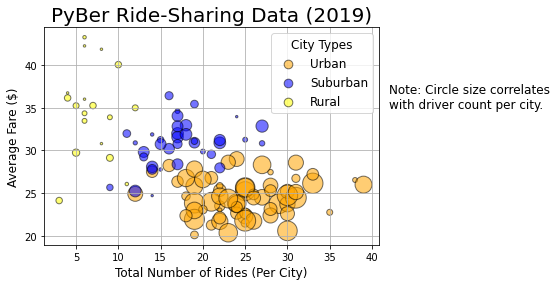

In [23]:
#the bubbles aren't big enough, i noticed after getting the below code correct
#so i'm coming  back up here to create a sizevariable
urbsize = urbancitydf['Drivers Per City']*6
subsize = suburbancitydf['Drivers Per City']*6
rursize = ruralcitydf['Drivers Per City']*6

#now we'll use those new DF_per_type to create a bubblechart

plt.scatter(urbancitydf['Total Rides Per City'],urbancitydf['Average Fare Per City'],
            edgecolors='black',c='orange',s=urbsize,alpha=0.55,label='Urban')
plt.scatter(suburbancitydf['Total Rides Per City'],suburbancitydf['Average Fare Per City'],
            edgecolors='black',c='blue',s=subsize,alpha=0.55,label='Suburban')
plt.scatter(ruralcitydf['Total Rides Per City'],ruralcitydf['Average Fare Per City'],
            edgecolors='black',c='yellow',s=rursize,alpha=0.55,label='Rural')


plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)",fontsize=12)
plt.ylabel("Average Fare ($)",fontsize=12)

plt.grid(True)


#i used, simply:  plt.legend(('Urban','Suburban','Rural'))
#which did work, but made the buble sizes way off
#if you do this, then the bubbles in the legend will even be sized to the average size of the bubbles on the chart

#so i totally changed the code.  made it more versatile and teachable here by using 
#legendHandles
#first, go back up and put in "labels=xyz" into each scatterplot, so that the legend knows what to display

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Let's break down what this code is doing for the legend:

# We made the font size for the text "small" with fontsize=12
# Then we expanded the legend horizontally using mode=Expanded to fit the area. 
#  - - Because the font size is small, this is optional.
# We added the number of scatter points in the legend for each marker to be 1. 
#  - - We can add multiple marker points by increasing the number.
# The location setting, loc=, for the legend is where it will fit the "best" based on the plotting of the data points.
# We added a legend title.
# We set each marker in the legend equal to 75-point font by using the legendHandles[]._sizes attribute 
#    and list indexing in the brackets to reference one of the three scatter plots. 
# Finally, we increased the font size of the legend title to 12.


#one final step is to add a note to the side of the chart
#check out the use of '\n' here, i came up with that myself

plt.text(42, 35, "Note: Circle size correlates \nwith driver count per city.", fontsize="12")

In [24]:
###NB on increasing size of bubbles
#above, i went 'back up' above working code, to create 3 variables for size bubbles.
#of course there is a better way
#ionstead of all that, just use -->
#             (... s=6*urbancitydf['Drivers Per City']...)
#instead of setting variables to be 6x

In [ ]:

##### 2021-10-14 NOTES Begin Here



In [35]:
#stats
import statistics as st
import numpy as np

# create a new DF with fares only
urban_fares=urban_df['fare']
# urban_fares

mean_uf = np.mean(urban_fares)
median_uf = np.median(urban_fares)
mode_uf = st.mode(urban_fares)
mode_uf

22.86

In [33]:
print(f"The mode fare price for urban trips is {mode_uf}.")

The mode fare price for urban trips is 22.86.
